## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import os
import keras
from keras.callbacks import ModelCheckpoint
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [20]:
def build_mlp(input_dim, num_neurons = [512, 256, 128], output_units = 10):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_dim)
    for i, n_unit in enumerate(num_neurons):
        if i == 0:
          hidden_layer = keras.layers.Dense(units=n_unit, activation='relu', name='hidden_layer_{}'.format(i+1))(input_layer)
          hidden_layer = keras.layers.BatchNormalization()(hidden_layer)
        else:
          hidden_layer = keras.layers.Dense(units=n_unit, activation='relu', name='hidden_layer_{}'.format(i+1))(hidden_layer)
          hidden_layer = keras.layers.BatchNormalization()(hidden_layer)
    output_layer = keras.layers.Dense(units=output_units, activation='softmax', name='output_layer')(hidden_layer)
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    return model

In [6]:
"""Code Here
設定超參數
"""
learning_rate = 1e-3
epochs = 50
batch_size = 256
momentum = 0.95

In [16]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
model_ckpt = ModelCheckpoint(filepath="/content/drive/MyDrive/Colab Notebooks/model_save/day086q1.h5", 
                             monitor="val_loss", 
                             save_best_only=False)

In [21]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_dim=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum, nesterov=True)
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)
model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (x_test, y_test), shuffle = True, callbacks = [model_ckpt])
# collect results:
trian_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 512)               1573376   
_________________________________________________________________
batch_normalization_21 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 256)               131328    
_________________________________________________________________
batch_normalization_22 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 128)               32896     
_________________________________________________________________
batch_normalization_23 (Batc (None, 128)               512 

In [30]:
# Load back
model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/model_save/day086q1.h5")
loss_loadback, acc_loadback = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3525 - accuracy: 0.4764


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

'Code Here\n將結果繪出\n'

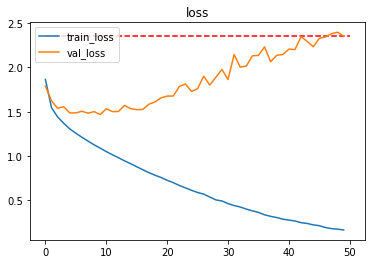

In [25]:
plt.plot(range(len(trian_loss)), trian_loss, label = 'train_loss')
plt.plot(range(len(val_loss)), val_loss, label = 'val_loss')
plt.hlines(y=loss_loadback, xmin=0, xmax=len(trian_loss), colors='r', linestyles='--')
plt.title('loss')
plt.legend(loc='best')
plt.show()

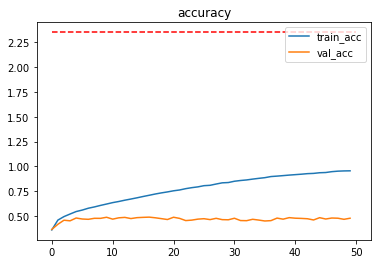

In [26]:
plt.plot(range(len(train_acc)), train_acc, label = 'train_acc')
plt.plot(range(len(val_acc)), val_acc, label = 'val_acc')
plt.hlines(y=loss_loadback, xmin=0, xmax=len(val_acc), colors='r', linestyles='--')
plt.title('accuracy')
plt.legend(loc='best')
plt.show()

In [32]:
model_ckpt = ModelCheckpoint(filepath="/content/drive/MyDrive/Colab Notebooks/model_save/day086q2.h5", 
                             monitor="val_loss", 
                             save_weights_only = True)
# results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_dim=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum, nesterov=True)
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)
model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (x_test, y_test), shuffle = True, callbacks = [model_ckpt])
# collect results:
trian_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 3072)]            0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 512)               1573376   
_________________________________________________________________
batch_normalization_27 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 256)               131328    
_________________________________________________________________
batch_normalization_28 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 128)               32896     
_________________________________________________________________
batch_normalization_29 (Batc (None, 128)               512 

In [35]:
# Load back
model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/model_save/day086q2.h5")
loss_loadback, acc_loadback = model.evaluate(x_test, y_test)

ValueError: ignored

In [ ]:
plt.plot(range(len(trian_loss)), trian_loss, label = 'train_loss')
plt.plot(range(len(val_loss)), val_loss, label = 'val_loss')
plt.hlines(y=loss_loadback, xmin=0, xmax=len(trian_loss), colors='r', linestyles='--')
plt.title('loss')
plt.legend(loc='best')
plt.show()

In [ ]:
plt.plot(range(len(train_acc)), train_acc, label = 'train_acc')
plt.plot(range(len(val_acc)), val_acc, label = 'val_acc')
plt.hlines(y=loss_loadback, xmin=0, xmax=len(val_acc), colors='r', linestyles='--')
plt.title('accuracy')
plt.legend(loc='best')
plt.show()